In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("income.csv")

In [3]:
dataset["Income"] = dataset["Income($)"]


In [4]:
dataset = dataset.drop(["Name","Income($)"],axis =1)

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
sc = MinMaxScaler()

In [7]:
dataset["Income"] = sc.fit_transform(dataset[["Income"]])
dataset["Age"] = sc.fit_transform(dataset[["Age"]])

In [8]:
dataset.head()

,Age,Income
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


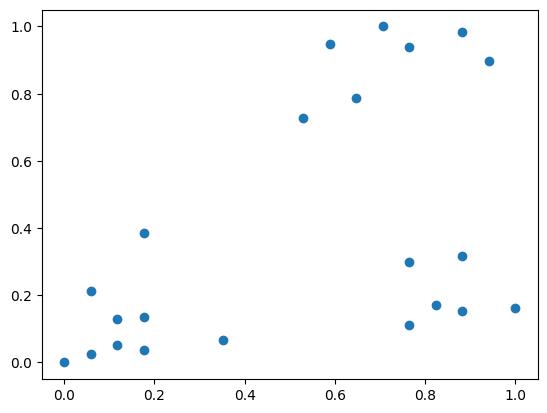

In [9]:
import matplotlib.pyplot as plt
plt.scatter(dataset["Age"],dataset["Income"])

In [10]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [11]:
y_pred = km.fit_predict(dataset[["Age","Income"]])

In [12]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [13]:
dataset["cluster"] = y_pred

In [14]:
dataset["cluster"].head()

0    0
1    0
2    0
3    0
4    1
Name: cluster, dtype: int32

In [15]:
km.cluster_centers_ #---> Centroid of the cluster

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

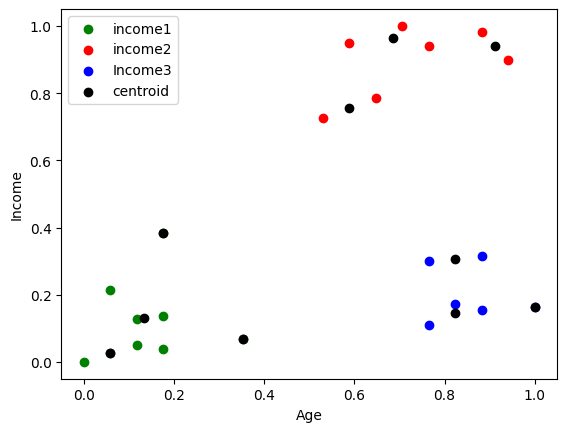

In [22]:
df1 = dataset[dataset["cluster"]==0]
df2 = dataset[dataset["cluster"]==1]
df3 = dataset[dataset["cluster"]==2]
plt.scatter(df1.Age,df1["Income"],color="green",label = "income1")
plt.scatter(df2.Age,df2["Income"],color="red",label = "income2")
plt.scatter(df3.Age,df3["Income"],color="blue",label = "Income3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = "black",label = "centroid")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

In [17]:
dataset.head()

,Age,Income,cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


In [18]:
k_rng = range(1,11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(dataset[["Age","Income"]])
    sse.append(km.inertia_)

In [19]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.26217927623452136,
 0.22020960864009398,
 0.1685851223602976,
 0.13265419827245162,
 0.10383752586603562,
 0.08139933135681814]

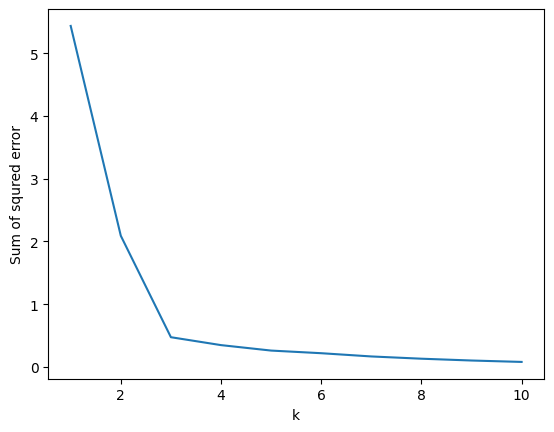

In [20]:
plt.xlabel('k')
plt.ylabel("Sum of squred error")
plt.plot(k_rng,sse)

In [21]:
# cluster = 3